In [407]:
import pandas as pd
from sklearn import preprocessing, decomposition
import scipy.stats as stats 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


In [408]:
import random 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

In [409]:
# plt.style.use("dark_background")
# for pdram in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
#     plt.rcParams[pdram] = '0.0'  # very light grey
# for pdram in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
#     plt.rcParams[pdram] = '#1a1c23'  # bluish dark grey

# Difference Between Clustring Methods
![pic](files/difference.png)

In [410]:
AggregationFile = np.genfromtxt("files/Aggregation.txt", delimiter="\t",dtype=np.float64)
FlameFile = np.genfromtxt("files/flame.txt", delimiter="\t",dtype=np.float64)
JainFile = np.genfromtxt("files/jain.txt", delimiter="\t",dtype=np.float64)
SpiralFile = np.genfromtxt("files/spiral.txt", delimiter="\t",dtype=np.float64)

# 1 - Plot Raw Data

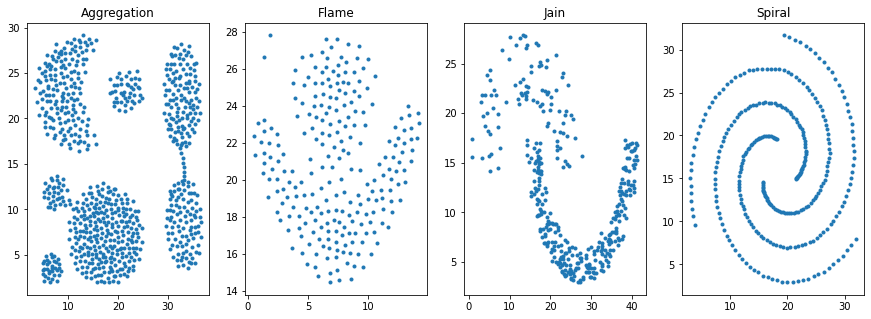

In [411]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axs[0].scatter(AggregationFile[:, 0], AggregationFile[:, 1], marker='.')
axs[1].scatter(FlameFile[:, 0], FlameFile[:, 1], marker='.')
axs[2].scatter(JainFile[:, 0], JainFile[:, 1], marker='.')
axs[3].scatter(SpiralFile[:, 0], SpiralFile[:, 1], marker='.')

for ax,name in zip(axs,["Aggregation","Flame","Jain","Spiral"]):
    ax.set_title(name)
plt.scatter
plt.show()

# 2 - KMeans

In [412]:
KMAggregation = KMeans(init = "k-means++", n_clusters = len(set(AggregationFile[:,2])), n_init = 12)
KMFlame = KMeans(init = "k-means++", n_clusters = len(set(FlameFile[:,2])), n_init = 12)
KMJain = KMeans(init = "k-means++", n_clusters = len(set(JainFile[:,2])), n_init = 12)
KMSpiral = KMeans(init = "k-means++", n_clusters = len(set(SpiralFile[:,2])), n_init = 12)

In [413]:
KMAggregation.fit(AggregationFile[:,:2])
KMJain.fit(JainFile[:,:2])
KMFlame.fit(FlameFile[:,:2])
KMSpiral.fit(SpiralFile[:,:2])

KMeans(n_clusters=3, n_init=12)

In [414]:
KMAggregationFile_labels = KMAggregation.labels_
KMJainFile_labels = KMJain.labels_
KMFlameFile_labels = KMFlame.labels_
KMSpiralFile_labels = KMSpiral.labels_

KMAggregationFile_cluster_centers = KMAggregation.cluster_centers_
KMJainFile_cluster_centers = KMJain.cluster_centers_
KMFlameFile_cluster_centers = KMFlame.cluster_centers_
KMSpiralFile_cluster_centers = KMSpiral.cluster_centers_

KMAggregationFile_cluster_centers

array([[ 7.36858974,  7.75705128],
       [33.14278846,  8.79375   ],
       [20.92561983,  6.83305785],
       [ 9.29464286, 22.95267857],
       [21.28723404, 22.99893617],
       [32.69453125, 22.13789062],
       [14.9165493 ,  7.39647887]])

In [415]:
def pltmaker(X, KMeanTrained:KMeans = None ,parent_axs=None):
    
    if KMeanTrained == None :
        k_means_cluster_centers = X[:,:2]
        k_means_labels = X[:,2]
    else:
        k_means_cluster_centers = KMeanTrained.cluster_centers_
        k_means_labels = KMeanTrained.labels_
    # Colors uses a color map, which will produce an array of colors based on
    # the number of labels there are. We use set(k_means_labels) to get the
    # unique labels.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

    
    if parent_axs :
        ax=parent_axs
    else :
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(20, 15))
        # Create a plot
        ax = fig.add_subplot(1, 1, 1)

    # For loop that plots the data points and centroids.
    # k will range from 0-3, which will match the possible clusters that each
    # data point is in.
    for k, col in zip(range(len(k_means_labels)), colors):

        # Create a list of all data points, where the data points that are 
        # in the cluster (ex. cluster 0) are labeled as true, else they are
        # labeled as false.
        my_members = (k_means_labels == k)
        
        # Define the centroid, or cluster center.
        cluster_center = k_means_cluster_centers[k]
        
        # Plots the datapoints with color col.
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.' , markersize=12)
        # Plots the centroids with specified color, but with a darker outline
        if KMeanTrained != None :
            ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=15)

    # Title of the plot
    ax.set_title('KMeans')

    # Remove x-axis ticks
    ax.set_xticks(())

    # Remove y-axis ticks
    ax.set_yticks(())

    # Show the plot
    if parent_axs:
        return ax
    plt.show()


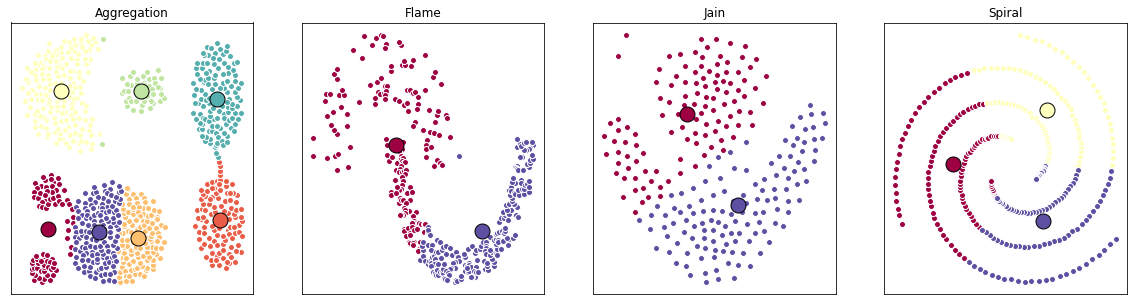

In [416]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axs[0] = pltmaker(AggregationFile,KMAggregation,axs[0])
axs[1] = pltmaker(JainFile,KMJain,axs[1])
axs[2] = pltmaker(FlameFile,KMFlame,axs[2])
axs[3] = pltmaker(SpiralFile,KMSpiral,axs[3])
for ax,name in zip(axs,["Aggregation","Flame","Jain","Spiral"]):
    ax.set_title(name)

## More Example

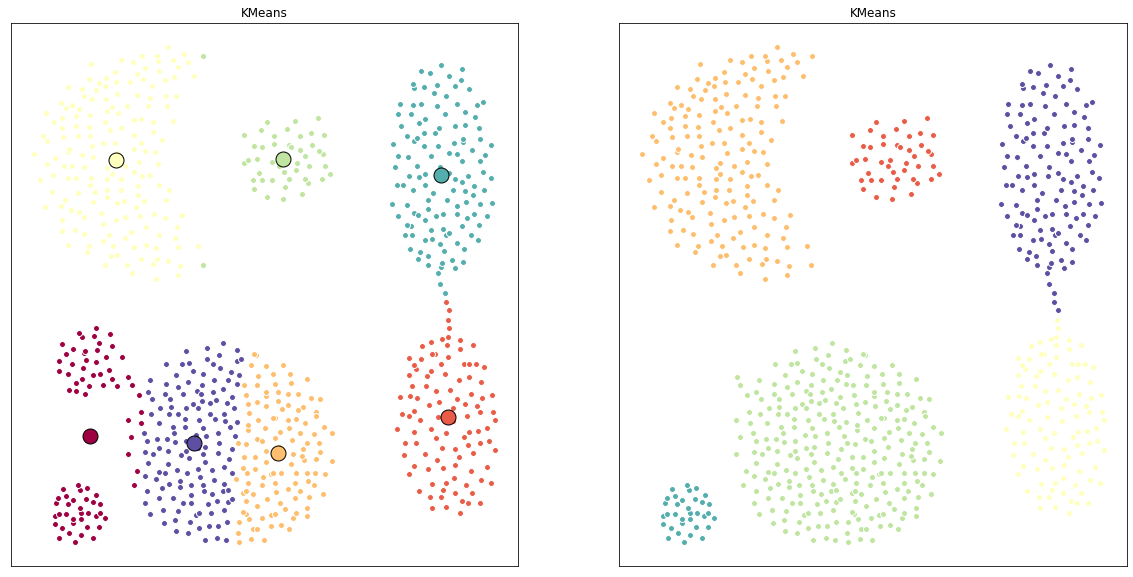

In [417]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs[0] = pltmaker(X=AggregationFile,KMeanTrained=KMAggregation,parent_axs=axs[0])
axs[1] = pltmaker(X=AggregationFile,parent_axs=axs[1])


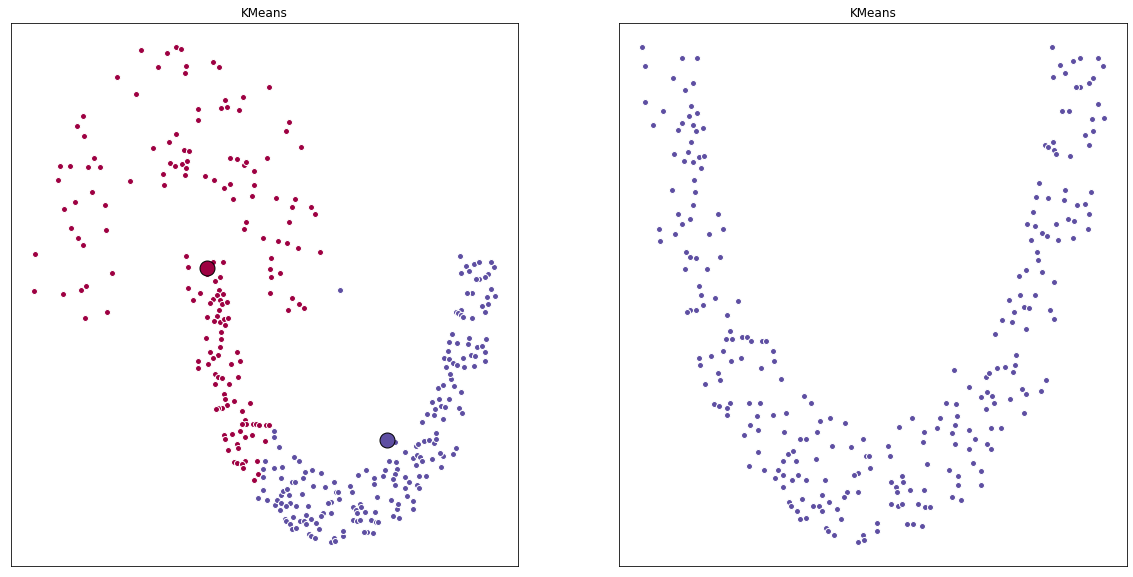

In [437]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs[0] = pltmaker(X=JainFile,KMeanTrained=KMJain,parent_axs=axs[0])
axs[1] = pltmaker(X=JainFile,parent_axs=axs[1])



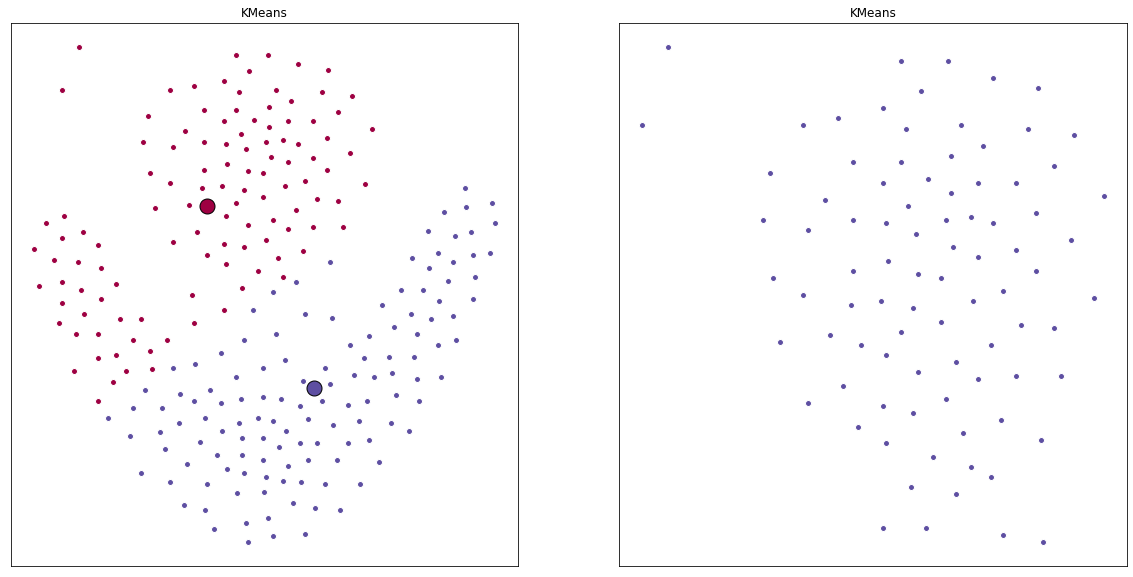

In [419]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs[0] = pltmaker(X=FlameFile,KMeanTrained=KMFlame,parent_axs=axs[0])
axs[1] = pltmaker(X=FlameFile,parent_axs=axs[1])


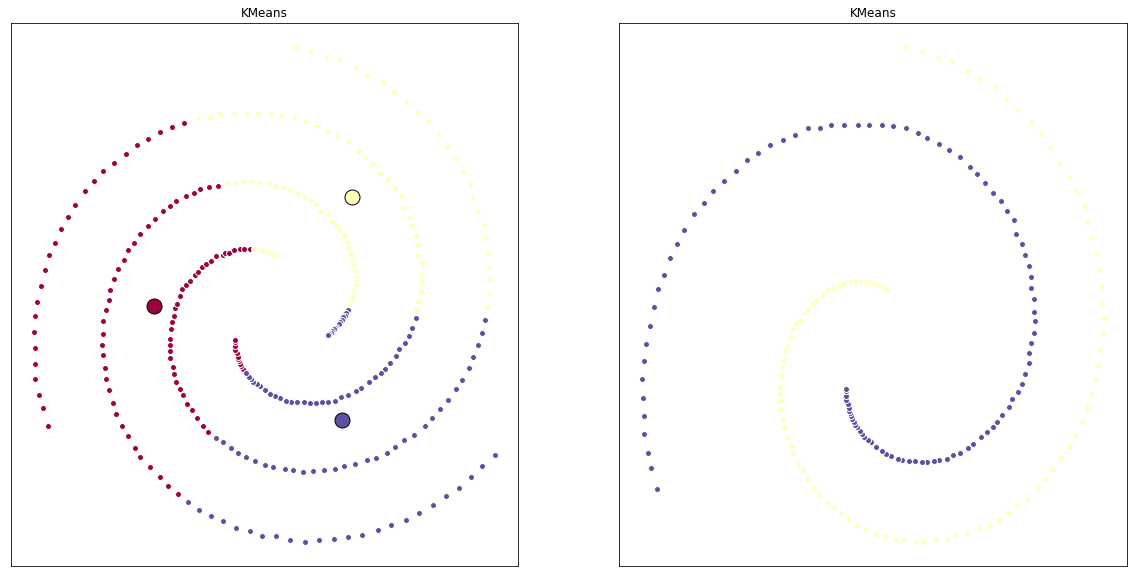

In [436]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs[0] = pltmaker(X=SpiralFile,KMeanTrained=KMSpiral,parent_axs=axs[0])
axs[1] = pltmaker(X=SpiralFile,parent_axs=axs[1])


# 3 - Agglomerative Clustering        

In [421]:
# import numpy as np 
# import pandas as pd
# from scipy import ndimage 
# from scipy.cluster import hierarchy 
# from scipy.spatial import distance_matrix 
# from matplotlib import pyplot as plt 
# from sklearn import manifold, datasets 
# from sklearn.cluster import AgglomerativeClustering 
# from sklearn.datasets import make_blobs 
# %matplotlib inline

In [422]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [423]:
AgglomAggregation = AgglomerativeClustering(n_clusters = len(set(AggregationFile[:,2])), linkage = 'average')
AgglomFlame = AgglomerativeClustering(n_clusters = len(set(FlameFile[:,2])), linkage = 'average')
AgglomJain = AgglomerativeClustering(n_clusters = len(set(JainFile[:,2])), linkage = 'average')
AgglomSpiral = AgglomerativeClustering(n_clusters = len(set(SpiralFile[:,2])), linkage = 'average')



AgglomAggregation.fit(AggregationFile[:,:2],AggregationFile[:,2])
AgglomFlame.fit(FlameFile[:,:2],FlameFile[:,2])
AgglomJain.fit(JainFile[:,:2],JainFile[:,2])
AgglomSpiral.fit(SpiralFile[:,:2],SpiralFile[:,2])

AgglomerativeClustering(linkage='average', n_clusters=3)

In [424]:
def agglomCustring(data:np.array, agglom:AgglomerativeClustering,parent_axs=None):
    # Create a figure of size 6 inches by 4 inches.
    if parent_axs :
        ax=parent_axs
    else :
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(10, 10))
        # Create a plot
        ax = plt
    X1 = data[:,:2]
    y1 = data[:,2]
    # These two lines of code are used to scale the data points down,
    # Or else the data points will be scattered very far apart.

    # Create a minimum and maximum range of X1.
    x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

    # Get the average distance for X1.
    X1 = (X1 - x_min) / (x_max - x_min)

    # This loop displays all of the datapoints.
    for i in range(X1.shape[0]):
        # Replace the data points with their respective cluster value 
        # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
        # ax.plot(X1[i:, 0], X1[i:, 1], 'w',
        #  markerfacecolor=plt.cm.nipy_spectral(y1[i] / 10),
        #  marker='.' , markersize=15)
        ax.text(X1[i, 0], X1[i, 1], str(int(y1[i])),
                color=plt.cm.nipy_spectral(agglom.labels_[i] /10 ),
                fontdict={'weight': 'bold', 'size': 9},
                )

    if parent_axs :
        # Remove the x ticks, y ticks, x and y axis
        ax.set_xticks([])
        ax.set_yticks([])
    else :
        plt.xticks([])
        plt.yticks([])
    #ax.axis('off')
   
    ax.legend(['First line', 'Second line'])
        # Show the plot
    if parent_axs:
        return ax
    # Display the plot of the original data before clustering
    # Display the plot
    ax.show()

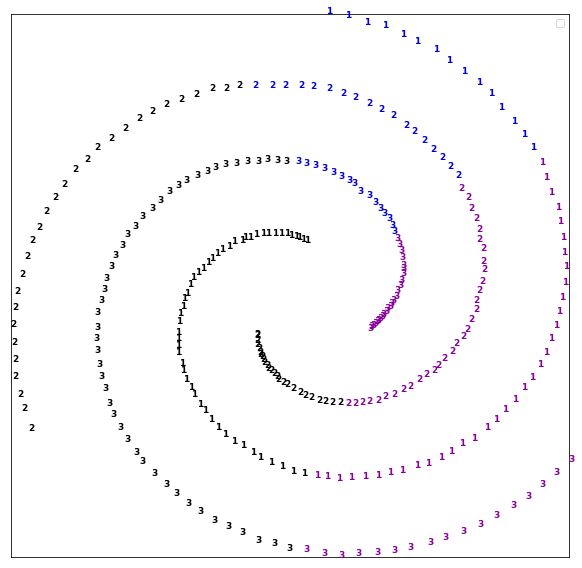

In [425]:
# agglomCustring(data=AggregationFile,agglom=AgglomAggregation,)
# agglomCustring(data=FlameFile,agglom=AgglomFlame,)
# agglomCustring(data=JainFile,agglom=AgglomJain,)
agglomCustring(data=SpiralFile,agglom=AgglomSpiral)


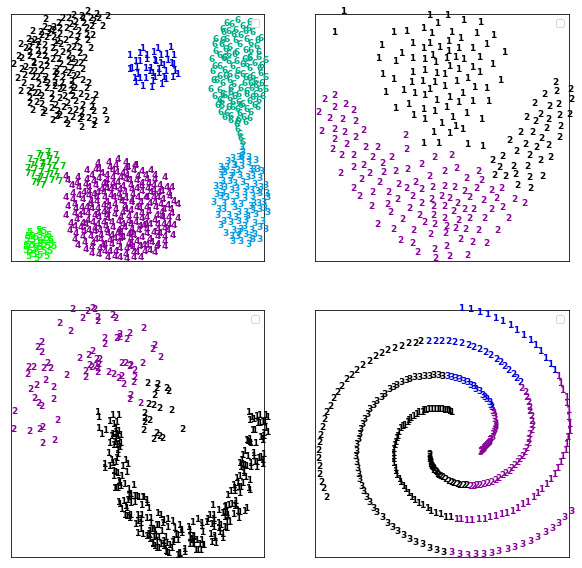

In [426]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1 = agglomCustring(data=AggregationFile,agglom=AgglomAggregation,parent_axs=ax1)
ax2 = agglomCustring(data=FlameFile,agglom=AgglomFlame,parent_axs=ax2)
ax3 = agglomCustring(data=JainFile,agglom=AgglomJain,parent_axs=ax3)
ax4 = agglomCustring(data=SpiralFile,agglom=AgglomSpiral,parent_axs=ax4)


# 4 - DBSCAN

In [427]:
# import numpy as np 
# from sklearn.cluster import DBSCAN 
# from sklearn.datasets.samples_generator import make_blobs 
# from sklearn.preprocessing import StandardScaler 
# import matplotlib.pyplot as plt 
# %matplotlib inline

In [428]:
from sklearn.cluster import DBSCAN 

In [460]:
epsilon = 3
minimumSamples = 10
DBAggregation = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(AggregationFile[:,:2])
DBFlame = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(FlameFile[:,:2])
DBJain = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(JainFile[:,:2])
DBSpiral = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(SpiralFile[:,:2])
DBAggregation_labels = DBAggregation.labels_
DBFlame_labels = DBFlame.labels_
DBJain_labels = DBJain.labels_
DBSpiral_labels = DBSpiral.labels_
# DBJain_labels

In [462]:
# Firts, create an array of booleans using the labels from db.

DBAggregationـcore_samples_mask = np.zeros_like(DBAggregation.labels_, dtype=bool)
DBAggregationـcore_samples_mask[DBAggregation.core_sample_indices_] = True

DBFlameـcore_samples_mask = np.zeros_like(DBFlame.labels_, dtype=bool)
DBFlameـcore_samples_mask[DBFlame.core_sample_indices_] = True

DBJainـcore_samples_mask = np.zeros_like(DBJain.labels_, dtype=bool)
DBJainـcore_samples_mask[DBJain.core_sample_indices_] = True

DBSpiralـcore_samples_mask = np.zeros_like(DBSpiral.labels_, dtype=bool)
DBSpiralـcore_samples_mask[DBSpiral.core_sample_indices_] = True

# core_samples_mask

In [463]:
# Number of clusters in labels, ignoring noise if present.
DBAggregationـn_clusters_ = len(set(DBAggregation_labels)) - (1 if -1 in DBAggregation_labels else 0)
DBFlameـn_clusters_ = len(set(DBFlame_labels)) - (1 if -1 in DBFlame_labels else 0)
DBJainـn_clusters_ = len(set(DBJain_labels)) - (1 if -1 in DBJain_labels else 0)
DBSpiralـn_clusters_ = len(set(DBSpiral_labels)) - (1 if -1 in DBSpiral_labels else 0)
DBSpiralـn_clusters_

3

In [464]:
# Remove repetition in labels by turning it into a set.
DBAggregation_unique_labels = set(DBAggregation_labels)
DBFlame_unique_labels = set(DBFlame_labels)
DBJain_unique_labels = set(DBJain_labels)
DBSpiral_unique_labels = set(DBSpiral_labels)
DBSpiral_unique_labels

{-1, 0, 1, 2}

In [468]:
def dbPlotMaker(X, unique_labels, lables, core_samples_mask,parent_axs=None):
    """
    X : Raw data
    """
    if parent_axs :
        ax=parent_axs
    else :
        # Initialize the plot with the specified dimensions.
        fig = plt.figure(figsize=(10, 10))
        # Create a plot
        ax = plt
        
    # Plot the points with colors
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, col in zip(unique_labels, colors):
        # Create colors for the clusters.

        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (lables == k)

        # Plot the datapoints that are clustered
        xy = X[class_member_mask & core_samples_mask]
        ax.scatter(xy[:, 0], xy[:, 1],s=100, c=[col], marker=u'o', alpha=0.5)

        # Plot the outliers
        xy = X[class_member_mask & ~core_samples_mask]
        # ax.plot(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
        ax.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    if parent_axs :
        # Remove the x ticks, y ticks, x and y axis
        ax.set_xticks([])
        ax.set_yticks([])
    else :
        plt.xticks([])
        plt.yticks([])

    if parent_axs:
        return ax
    ax.show()

AttributeError: 'PathCollection' object has no property 'markeredgecolor'

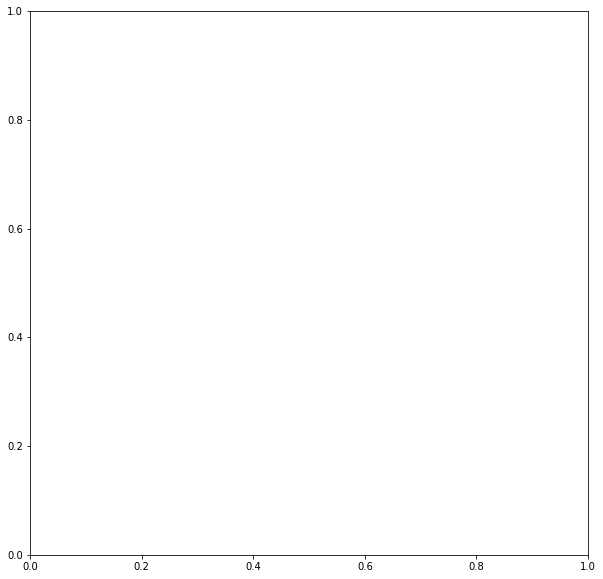

In [469]:
dbPlotMaker(SpiralFile, DBSpiral_unique_labels, DBSpiral_labels, DBSpiralـcore_samples_mask )

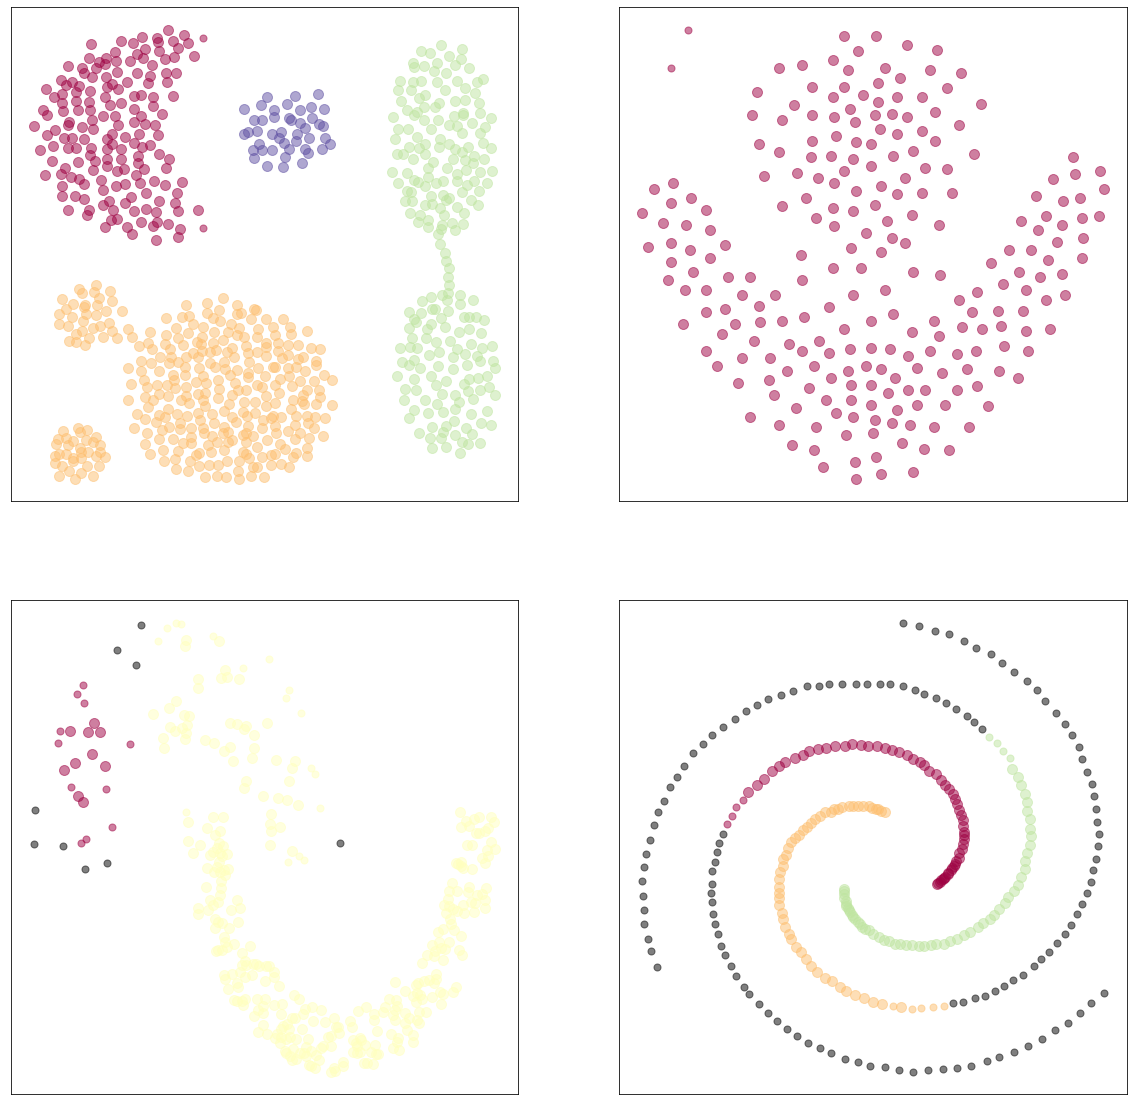

In [467]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax1 = dbPlotMaker(X=AggregationFile, unique_labels=DBAggregation_unique_labels, lables=DBAggregation_labels, core_samples_mask=DBAggregationـcore_samples_mask, parent_axs=ax1)
ax2 = dbPlotMaker(FlameFile, DBFlame_unique_labels, DBFlame_labels, DBFlameـcore_samples_mask, parent_axs=ax2)
ax3 = dbPlotMaker(JainFile, DBJain_unique_labels, DBJain_labels, DBJainـcore_samples_mask, parent_axs=ax3)
ax4 = dbPlotMaker(SpiralFile, DBSpiral_unique_labels, DBSpiral_labels, DBSpiralـcore_samples_mask, parent_axs=ax4)
